In [1]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import datetime

In [2]:

#get ticker data
indx = 'SP500'
source_table_name = 'Data/'+indx+'.csv'
data_table = pd.read_csv(source_table_name)
# data_table = data_table.head(4)
# data_table

tickers = data_table['Symbol'].str.strip()

companies_dict = {}

for index, row in data_table.iterrows():
    # if index <= 10 :
    # print(index)
    # print(row['Symbol'] , row['Security'])
    companies_dict[row['Symbol']] = row['Security']


companies = sorted(companies_dict.items(), key=lambda x: x[1])
    


In [3]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '10/24/2019'
end_date = '10/27/2021'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(tickers), data_source, start_date, end_date)
panel_data.to_csv('sp500_prices.csv', index=False)


print(panel_data)

C:\Users\vmuty\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\vmuty\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Attributes   Adj Close                                                  \
Symbols            MMM         ABT        ABBV        ABMD         ACN   
Date                                                                     
2019-10-24  151.198685   78.877991   69.440674  179.960007  179.853958   
2019-10-25  155.121338   79.159142   69.196548  182.339996  177.977661   
2019-10-28  157.895187   80.138336   70.824066  183.910004  177.783218   
2019-10-29  157.661682   80.904236   70.950661  184.949997  179.659531   
2019-10-30  157.250763   81.447136   72.026611  181.770004  181.390060   
...                ...         ...         ...         ...         ...   
2021-10-21  182.119995  125.050003  108.760002  349.679993  347.119995   
2021-10-22  180.800003  126.720001  109.139999  352.179993  353.790009   
2021-10-25  182.399994  126.580002  108.500000  354.019989  356.440002   
2021-10-26  182.160004  128.130005  109.489998  348.299988  356.339996   
2021-10-27  178.240005  127.709999  10

In [4]:

# Find Stock Open and Close Values
panel_data = panel_data.fillna(0)
# panel_data['Close'].fillna(0)
# panel_data['Open'].fillna(0)
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])


Symbols
MMM      161.889999
ABT       81.360001
ABBV      76.800003
ABMD     179.960007
ACN      185.000000
            ...    
ZBH      134.889999
ZION      47.509998
ZTS      122.949997
BRK.B      0.000000
BF.B       0.000000
Name: 2019-10-24 00:00:00, Length: 505, dtype: float64


In [5]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [6]:
# companies[i][1]

In [7]:
movmts = []
for i in range(0, len(companies)):
 print('Company: {}, Ticker: {}, Change: {}'.format(companies[i][0],companies[i][1], sum(movements[i][:])))
 movmts.append([companies[i][0],companies[i][1], sum(movements[i][:])])
movmts 
movmts_df = pd.DataFrame(movmts, columns=['Company', 'Symbol', 'Movement'])
movmts_df

Company: MMM, Ticker: 3M, Change: -35.46995544433594
Company: AOS, Ticker: A. O. Smith, Change: 16.260101318359375
Company: ADM, Ticker: ADM, Change: 0.109954833984375
Company: AES, Ticker: AES Corp, Change: 152.7498016357422
Company: APA, Ticker: APA Corporation, Change: 87.22018432617188
Company: T, Ticker: AT&T, Change: -29.73995590209961
Company: ABBV, Ticker: AbbVie, Change: 72.61019897460938
Company: ABT, Ticker: Abbott Laboratories, Change: 18.36003303527832
Company: ABMD, Ticker: Abiomed, Change: -28.949905395507812
Company: ACN, Ticker: Accenture, Change: 3.0500078201293945
Company: ATVI, Ticker: Activision Blizzard, Change: -11.499979019165039
Company: ADBE, Ticker: Adobe, Change: 6.4298553466796875
Company: AAP, Ticker: Advance Auto Parts, Change: -10.209854125976562
Company: AMD, Ticker: Advanced Micro Devices, Change: -5.339996337890625
Company: AFL, Ticker: Aflac, Change: -58.720069885253906
Company: A, Ticker: Agilent Technologies, Change: 92.98987197875977
Company: APD,

,Company,Symbol,Movement
0,MMM,3M,-35.469955
1,AOS,A. O. Smith,16.260101
2,ADM,ADM,0.109955
3,AES,AES Corp,152.749802
4,APA,APA Corporation,87.220184
...,...,...,...
500,ZBRA,Zebra Technologies,-52.220055
501,ZBH,Zimmer Biomet,5.130022
502,ZION,Zions Bancorp,35.630150
503,ZTS,Zoetis,0.000000


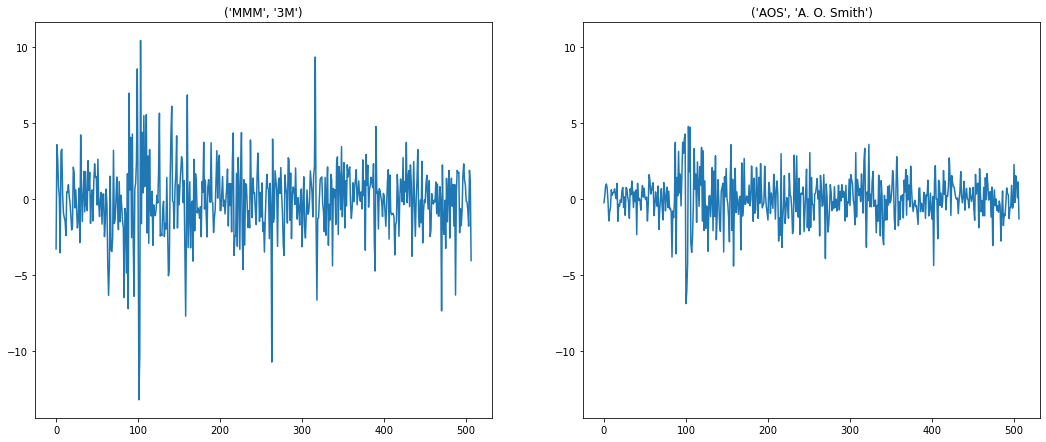

In [8]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [9]:
import numpy as np
movements
where_are_NaNs = np.isnan(movements)
movements[where_are_NaNs] = 0
movements

array([[-3.27000427,  3.58000183,  2.58000183, ...,  1.8999939 ,
         1.08999634, -4.02999878],
       [-0.22999573,  0.20000458,  0.86000061, ...,  0.09000397,
         1.13000488, -1.29000092],
       [-1.03999329,  0.13999939,  1.66000366, ..., -0.58000183,
         0.68000031, -1.18000031],
       ...,
       [ 0.33999634,  1.19000244,  0.66999817, ...,  2.71000671,
        -0.47999573, -0.67999268],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [10]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.525622290424807
-0.6495423535961424
2.811673979134981e-05


In [11]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [12]:
panel_data

Attributes   Adj Close                                                  \
Symbols            MMM         ABT        ABBV        ABMD         ACN   
Date                                                                     
2019-10-24  151.198685   78.877991   69.440674  179.960007  179.853958   
2019-10-25  155.121338   79.159142   69.196548  182.339996  177.977661   
2019-10-28  157.895187   80.138336   70.824066  183.910004  177.783218   
2019-10-29  157.661682   80.904236   70.950661  184.949997  179.659531   
2019-10-30  157.250763   81.447136   72.026611  181.770004  181.390060   
...                ...         ...         ...         ...         ...   
2021-10-21  182.119995  125.050003  108.760002  349.679993  347.119995   
2021-10-22  180.800003  126.720001  109.139999  352.179993  353.790009   
2021-10-25  182.399994  126.580002  108.500000  354.019989  356.440002   
2021-10-26  182.160004  128.130005  109.489998  348.299988  356.339996   
2021-10-27  178.240005  127.709999  108.400002  344.579987  354.049988   

Attributes                                                            ...  \
Symbols          ATVI        ADBE         AMD         AAP        AES  ...   
Date                                                                  ...   
2019-10-24  54.812366  269.700012   31.719999  163.608276  15.896651  ...   
2019-10-25  54.634403  270.980011   32.709999  162.382263  15.821313  ...   
2019-10-28  53.942329  271.350006   33.689999  163.215958  15.990825  ...   
2019-10-29  53.388668  271.450012   33.029999  161.195511  16.094419  ...   
2019-10-30  55.237499  278.410004   33.130001  160.822784  16.207428  ...   
...               ...         ...         ...         ...        ...  ...   
2021-10-21  78.699997  638.659973  119.330002  233.710007  24.790001  ...   
2021-10-22  79.269997  643.580017  119.820000  231.970001  24.930000  ...   
2021-10-25  81.190002  646.969971  122.360001  230.130005  25.170000  ...   
2021-10-26  80.760002  642.500000  122.930000  232.559998  25.370001  ...   
2021-10-27  78.650002  640.080017  122.279999  230.350006  25.660000  ...   

Attributes     Volume                                                       \
Symbols           XEL       XLNX       XYL        YUM       ZBRA       ZBH   
Date                                                                         
2019-10-24  2579100.0  6455400.0  736300.0  1391700.0   426400.0  683000.0   
2019-10-25  3336400.0  3470400.0  713800.0   985700.0   553900.0  705100.0   
2019-10-28  3329600.0  3110900.0  753300.0  2127600.0   868400.0  540200.0   
2019-10-29  2490800.0  2941300.0  735700.0  2024900.0  1181400.0  750000.0   
2019-10-30  2761800.0  3563300.0  966700.0  9020100.0   717000.0  528400.0   
...               ...        ...       ...        ...        ...       ...   
2021-10-21  2344300.0  1237700.0  521400.0  1192400.0   172700.0  739500.0   
2021-10-22  1978800.0  1556600.0  499900.0   994300.0   221200.0  320800.0   
2021-10-25  2402800.0  1102800.0  478400.0  1343500.0   165900.0  825100.0   
2021-10-26  3925600.0  2536800.0  579500.0  1537900.0   131000.0  462200.0   
2021-10-27  3546000.0  4123300.0  484100.0  1427600.0   155800.0  658800.0   

Attributes                                   
Symbols          ZION        ZTS BRK.B BF.B  
Date                                         
2019-10-24  1532500.0  2195800.0   0.0  0.0  
2019-10-25  1572200.0  1561000.0   0.0  0.0  
2019-10-28  1961900.0  1441800.0   0.0  0.0  
2019-10-29  2419800.0  1683700.0   0.0  0.0  
2019-10-30  2003500.0  2042500.0   0.0  0.0  
...               ...        ...   ...  ...  
2021-10-21   988500.0   957000.0   0.0  0.0  
2021-10-22  1524100.0  1104400.0   0.0  0.0  
2021-10-25  1144200.0  1224700.0   0.0  0.0  
2021-10-26  1004100.0  1219300.0   0.0  0.0  
2021-10-27  1457900.0  1625200.0   0.0  0.0  

[507 rows x 3030 columns]

In [13]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [14]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
# print(df.sort_values('labels'))
df

,labels,companies
0,0,"(MMM, 3M)"
1,1,"(AOS, A. O. Smith)"
2,5,"(ADM, ADM)"
3,7,"(AES, AES Corp)"
4,1,"(APA, APA Corporation)"
...,...,...
500,1,"(ZBRA, Zebra Technologies)"
501,6,"(ZBH, Zimmer Biomet)"
502,1,"(ZION, Zions Bancorp)"
503,7,"(ZTS, Zoetis)"


In [15]:
movmts_df


,Company,Symbol,Movement
0,MMM,3M,-35.469955
1,AOS,A. O. Smith,16.260101
2,ADM,ADM,0.109955
3,AES,AES Corp,152.749802
4,APA,APA Corporation,87.220184
...,...,...,...
500,ZBRA,Zebra Technologies,-52.220055
501,ZBH,Zimmer Biomet,5.130022
502,ZION,Zions Bancorp,35.630150
503,ZTS,Zoetis,0.000000


In [16]:
companies

[('MMM', '3M'),
 ('AOS', 'A. O. Smith'),
 ('ADM', 'ADM'),
 ('AES', 'AES Corp'),
 ('APA', 'APA Corporation'),
 ('T', 'AT&T'),
 ('ABBV', 'AbbVie'),
 ('ABT', 'Abbott Laboratories'),
 ('ABMD', 'Abiomed'),
 ('ACN', 'Accenture'),
 ('ATVI', 'Activision Blizzard'),
 ('ADBE', 'Adobe'),
 ('AAP', 'Advance Auto Parts'),
 ('AMD', 'Advanced Micro Devices'),
 ('AFL', 'Aflac'),
 ('A', 'Agilent Technologies'),
 ('APD', 'Air Products & Chemicals'),
 ('AKAM', 'Akamai Technologies'),
 ('ALK', 'Alaska Air Group'),
 ('ALB', 'Albemarle Corporation'),
 ('ARE', 'Alexandria Real Estate Equities'),
 ('ALGN', 'Align Technology'),
 ('ALLE', 'Allegion'),
 ('LNT', 'Alliant Energy'),
 ('ALL', 'Allstate Corp'),
 ('GOOGL', 'Alphabet\xa0(Class A)'),
 ('GOOG', 'Alphabet\xa0(Class C)'),
 ('MO', 'Altria Group'),
 ('AMZN', 'Amazon'),
 ('AMCR', 'Amcor'),
 ('AEE', 'Ameren Corp'),
 ('AAL', 'American Airlines Group'),
 ('AEP', 'American Electric Power'),
 ('AXP', 'American Express'),
 ('AIG', 'American International Group'),
 (

In [17]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labbels
print(df.sort_values('labels'))

     labels                    companies
504       0                 (EBAY, eBay)
307       0  (MCK, McKesson Corporation)
114       0   (CTAS, Cintas Corporation)
112       0                  (CI, Cigna)
310       0               (MET, MetLife)
..      ...                          ...
185       4   (EXR, Extra Space Storage)
346       4  (ORLY, O'Reilly Automotive)
351       4               (ORCL, Oracle)
406       4            (CRM, Salesforce)
252       4    (IP, International Paper)

[505 rows x 2 columns]


In [18]:
movmts_df['Cluster'] = labels
movmts_df.sort_values('Company')

,Company,Symbol,Movement,Cluster
15,A,Agilent Technologies,92.989872,4
31,AAL,American Airlines Group,28.820068,2
12,AAP,Advance Auto Parts,-10.209854,0
46,AAPL,Apple,-5.910133,4
6,ABBV,AbbVie,72.610199,3
...,...,...,...,...
499,YUM,Yum! Brands,56.750305,3
501,ZBH,Zimmer Biomet,5.130022,4
500,ZBRA,Zebra Technologies,-52.220055,1
502,ZION,Zions Bancorp,35.630150,0


In [19]:
file_path = "Data/Analyzed/"+'SP500'+"_Clustered_Stocks_Movement.csv"
movmts_df.to_csv(file_path, index=False)

In [20]:
file_path

'Data/Analyzed/SP500_Clustered_Stocks_Movement.csv'

In [21]:
df

,labels,companies
0,1,"(MMM, 3M)"
1,0,"(AOS, A. O. Smith)"
2,0,"(ADM, ADM)"
3,3,"(AES, AES Corp)"
4,0,"(APA, APA Corporation)"
...,...,...
500,1,"(ZBRA, Zebra Technologies)"
501,4,"(ZBH, Zimmer Biomet)"
502,0,"(ZION, Zions Bancorp)"
503,0,"(ZTS, Zoetis)"


In [22]:
reduced_data


array([[-0.00847851, -0.25930896],
       [-0.49961808,  0.00415917],
       [-0.12883532,  0.00606563],
       ...,
       [-0.44346613,  0.13086286],
       [-0.07112128,  0.09627995],
       [-0.07112128,  0.09627995]])

In [23]:
data_df = pd.DataFrame(reduced_data, columns=["PC 1", "PC 2"])
print(data_df.shape)
data_df.head(10)

(505, 2)


,PC 1,PC 2
0,-0.008479,-0.259309
1,-0.499618,0.004159
2,-0.128835,0.006066
3,-0.275937,0.319386
4,-0.222873,0.101893
5,-0.423867,0.322551
6,-0.471119,0.497827
7,-0.254767,0.539159
8,0.057548,-0.065927
9,0.161885,0.080647


C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


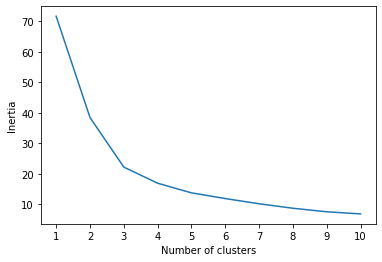

In [24]:
# Initialize empty inertia list
distortions=[]
inertia = []
# Initialize k range
k = list(range(1,11))
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_data)
    distortions.append(sum(np.min(cdist(reduced_data, km.cluster_centers_,
                                        'euclidean'), axis=1)) / new.shape[0])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<Figure size 432x288 with 0 Axes>

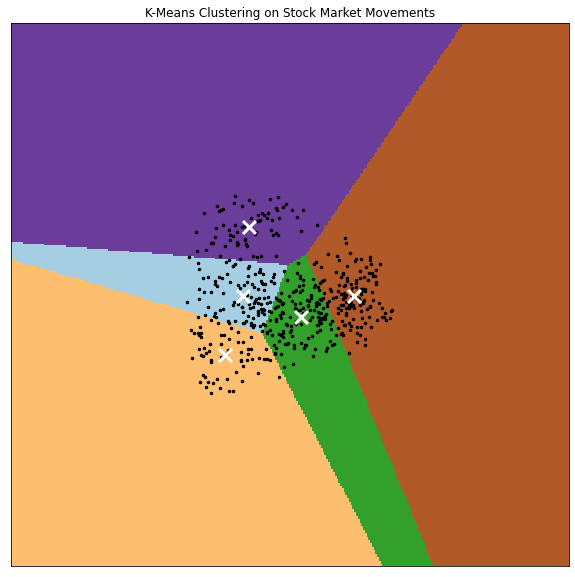

In [25]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()